# Solar Power Prediction
Antonio Lang
CS 458

In [48]:
import IPython

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

train_data = pd.read_csv("solar_training.csv")
test_data = pd.read_csv("solar_test.csv")

# Data Exploration

In [49]:
train_data.head()

,ZONEID,TIMESTAMP,VAR78,VAR79,VAR134,VAR157,VAR164,VAR165,VAR166,VAR167,VAR169,VAR175,VAR178,VAR228,POWER
0,1,20120401 01:00,0.001967,0.003609,94843.6250,60.221909,0.244601,1.039334,-2.503039,294.448486,2577830.0,1202532.0,2861797.0,0.000000,0.754103
1,1,20120401 02:00,0.005524,0.033575,94757.9375,54.678604,0.457138,2.482865,-2.993330,295.651367,5356093.0,2446757.0,5949378.0,0.000000,0.555000
2,1,20120401 03:00,0.030113,0.132009,94732.8125,61.294891,0.771429,3.339867,-1.982535,294.454590,7921788.0,3681336.0,8939176.0,0.001341,0.438397
3,1,20120401 04:00,0.057167,0.110645,94704.0625,67.775284,0.965866,3.106102,-1.446051,293.261475,9860520.0,4921504.0,11331679.0,0.002501,0.145449
4,1,20120401 05:00,0.051027,0.189560,94675.0000,70.172989,0.944669,2.601146,-1.904493,292.732910,11143097.0,6254380.0,13105558.0,0.003331,0.111987


In [50]:
training_data_1 = train_data[train_data['ZONEID'] == 1]
test_data_1 = test_data[test_data['ZONEID'] == 1]
training_data_1.pop('ZONEID')
train_time_1 = pd.to_datetime(training_data_1.pop('TIMESTAMP'), format='%Y%m%d %H:%M')
test_time_1 = pd.to_datetime(test_data_1.pop('TIMESTAMP'), format='%Y%m%d %H:%M')

training_data_2 = train_data[train_data['ZONEID'] == 2]
test_data_2 = test_data[test_data['ZONEID'] == 2]
training_data_2.pop('ZONEID')
train_time_2 = pd.to_datetime(training_data_2.pop('TIMESTAMP'), format='%Y%m%d %H:%M')
test_time_2 = pd.to_datetime(test_data_2.pop('TIMESTAMP'), format='%Y%m%d %H:%M')

training_data_3 = train_data[train_data['ZONEID'] == 3]
test_data_3 = test_data[test_data['ZONEID'] == 3]
training_data_3.pop('ZONEID')
train_time_3 = pd.to_datetime(training_data_3.pop('TIMESTAMP'), format='%Y%m%d %H:%M')
test_time_3 = pd.to_datetime(test_data_3.pop('TIMESTAMP'), format='%Y%m%d %H:%M')

train_data = [training_data_1, training_data_2, training_data_3]
test_data = [test_data_1, test_data_2, test_data_3]
train_time = [train_time_1, train_time_2, train_time_3]
test_time = [test_time_1, test_time_2, test_time_3]

del training_data_1, training_data_2, training_data_3
del test_data_1, test_data_2, test_data_3
del train_time_1, train_time_2, train_time_3
del test_time_1, test_time_2, test_time_3

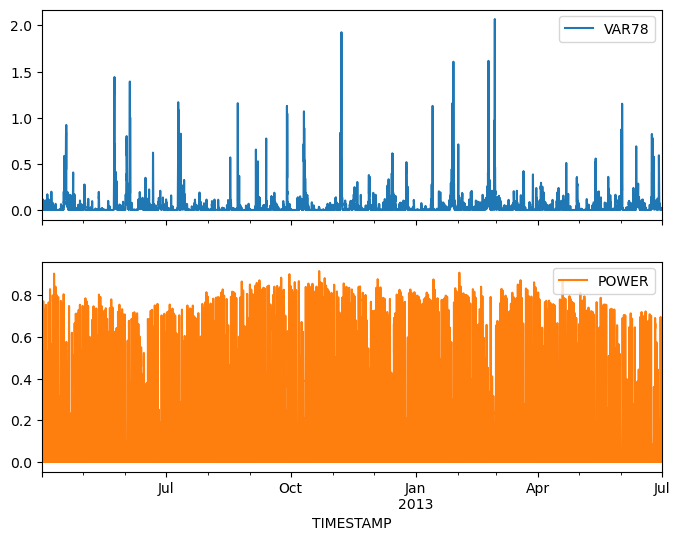

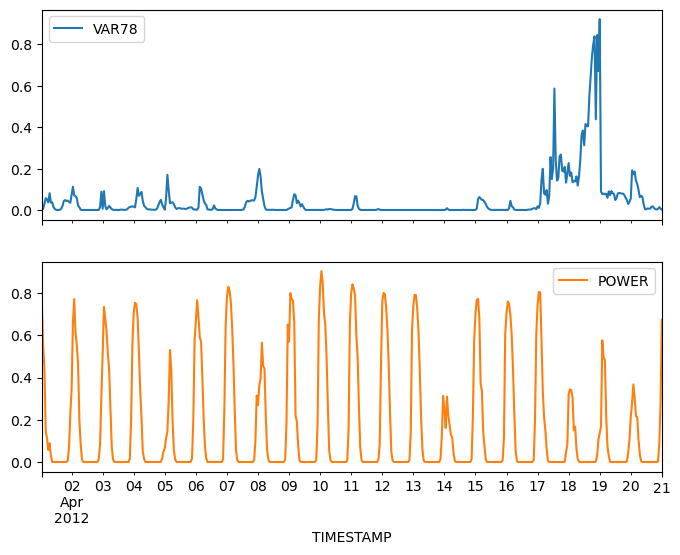

In [51]:
plot_cols = ['VAR78', 'POWER']
plot_features = train_data[0][plot_cols]
plot_features.index = train_time[0]
_ = plot_features.plot(subplots=True)

plot_features = train_data[0][plot_cols][:480]
plot_features.index = train_time[0][:480]
_ = plot_features.plot(subplots=True)

In [52]:
train_data[0].head()

,VAR78,VAR79,VAR134,VAR157,VAR164,VAR165,VAR166,VAR167,VAR169,VAR175,VAR178,VAR228,POWER
0,0.001967,0.003609,94843.6250,60.221909,0.244601,1.039334,-2.503039,294.448486,2577830.0,1202532.0,2861797.0,0.000000,0.754103
1,0.005524,0.033575,94757.9375,54.678604,0.457138,2.482865,-2.993330,295.651367,5356093.0,2446757.0,5949378.0,0.000000,0.555000
2,0.030113,0.132009,94732.8125,61.294891,0.771429,3.339867,-1.982535,294.454590,7921788.0,3681336.0,8939176.0,0.001341,0.438397
3,0.057167,0.110645,94704.0625,67.775284,0.965866,3.106102,-1.446051,293.261475,9860520.0,4921504.0,11331679.0,0.002501,0.145449
4,0.051027,0.189560,94675.0000,70.172989,0.944669,2.601146,-1.904493,292.732910,11143097.0,6254380.0,13105558.0,0.003331,0.111987


In [53]:
train_data[0].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
VAR78,10944.0,3.889433e-02,1.138095e-01,0.000000,0.000000e+00,2.349854e-03,3.238106e-02,2.068974e+00
VAR79,10944.0,1.565516e-02,4.971535e-02,0.000000,0.000000e+00,8.130000e-05,5.745411e-03,6.066458e-01
VAR134,10944.0,9.477877e+04,5.725483e+02,92587.812500,9.439694e+04,9.476612e+04,9.518114e+04,9.630806e+04
VAR157,10944.0,6.906619e+01,1.948787e+01,10.228189,5.465900e+01,7.208055e+01,8.583268e+01,1.017909e+02
VAR164,10944.0,4.159219e-01,3.981049e-01,0.000000,7.354736e-03,2.982025e-01,8.552530e-01,1.000007e+00
VAR165,10944.0,7.318901e-01,2.726314e+00,-8.908603,-1.071350e+00,5.216699e-01,2.350360e+00,1.305672e+01
VAR166,10944.0,-1.831618e-01,1.922577e+00,-7.636124,-1.451407e+00,-3.780746e-01,9.789636e-01,8.979910e+00
VAR167,10944.0,2.851357e+02,7.177476e+00,270.266357,2.797714e+02,2.842356e+02,2.898708e+02,3.100623e+02
VAR169,10944.0,1.189265e+07,6.451321e+06,187820.375000,7.201339e+06,1.058380e+07,1.652278e+07,3.410930e+07
VAR175,10944.0,1.381978e+07,7.719015e+06,865972.812500,7.316644e+06,1.372081e+07,1.994981e+07,3.417538e+07


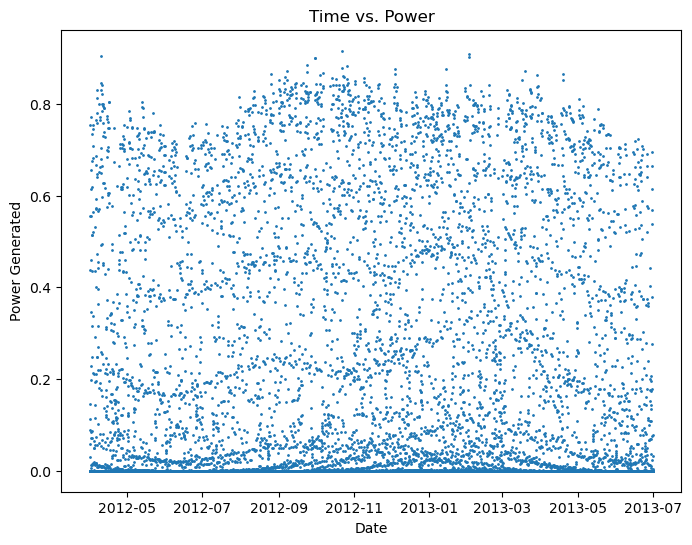

In [54]:
plt.title("Time vs. Power")
plt.xlabel("Date")
plt.ylabel("Power Generated")
plt.scatter(train_time[0], train_data[0]['POWER'], s=1)

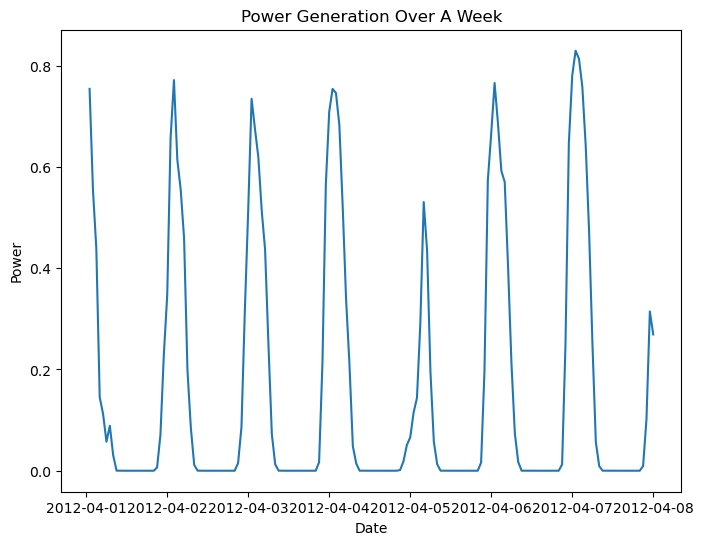

In [55]:
hours_in_week = 7 * 24
plt.title("Power Generation Over A Week")
plt.xlabel('Date')
plt.ylabel('Power')
plt.plot(train_time[0][:hours_in_week], train_data[0][:hours_in_week]['POWER'])

The graph above highlights the cyclical nature of power generation over the course of a week.

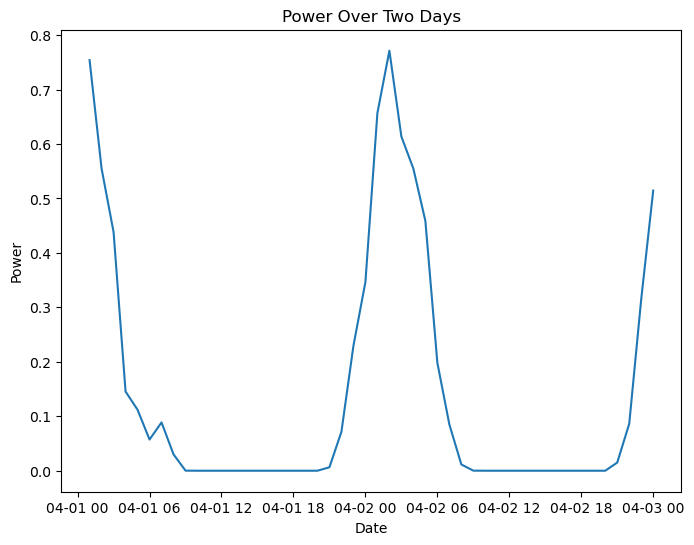

In [56]:
data_range = 2 * 24
plt.title("Power Over Two Days")
plt.xlabel('Date')
plt.ylabel('Power')
plt.plot(train_time[0][:data_range], train_data[0][:data_range]['POWER'])

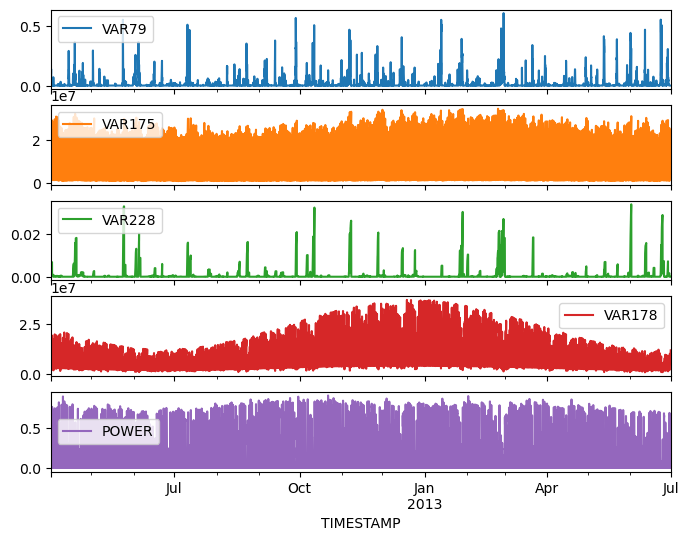

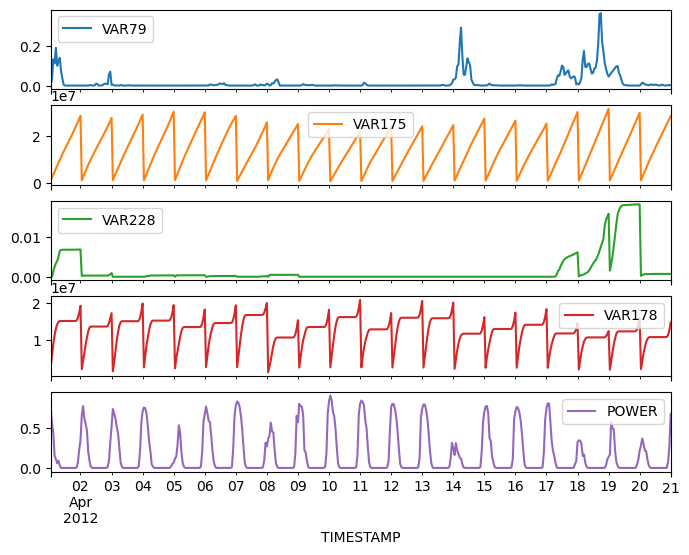

In [57]:
plot_cols = ['VAR79', 'VAR175', 'VAR228', 'VAR178', 'POWER']
plot_features = train_data[0][plot_cols]
plot_features.index = train_time[0]
_ = plot_features.plot(subplots=True)

plot_features = train_data[0][plot_cols][:480]
plot_features.index = train_time[0][:480]
_ = plot_features.plot(subplots=True)

# Feature Engineering

In [58]:
# Split training data into training and validation sets

for dataset in train_data:
    pass

column_indices = {name: i for i, name in enumerate(train_data[0].columns)}

n = len(train_data[0])
train_df = train_data[0][0:int(n*0.7)]
val_df = train_data[0][int(n*0.7):]

num_features = train_data[0].shape[1]

In [59]:
# Normalize Data

train_mean = train_df.mean()
train_std = train_df.std()

train_mean['POWER'] = 0
train_std['POWER'] = 1

train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_data[0] = (test_data[0] - train_mean) / train_std

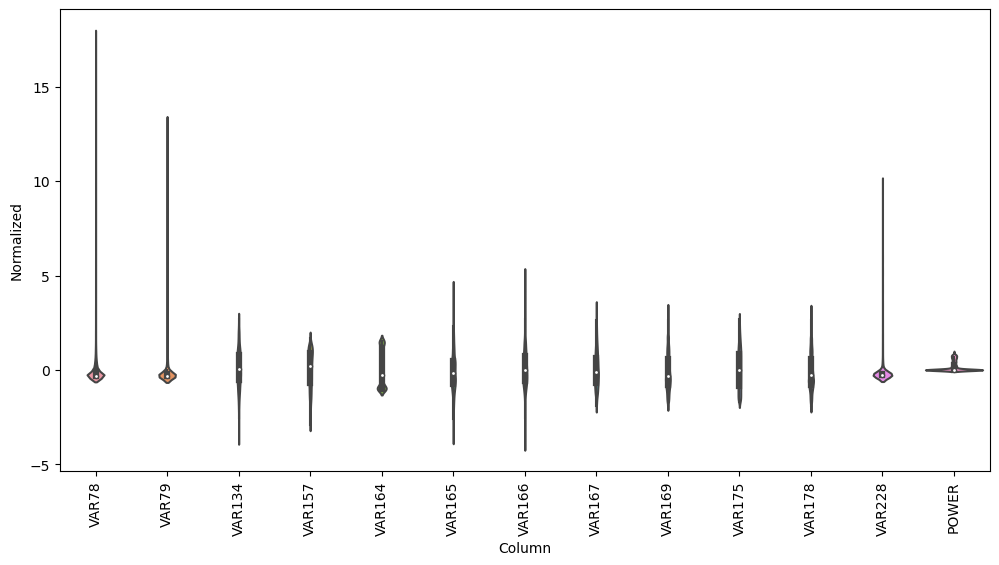

In [60]:
df_std = (train_data[0] - train_mean) / train_std
df_std = df_std.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
_ = ax.set_xticklabels(train_data[0].keys(), rotation=90)

# Windowing the Data

# Simple Solutions

### Same-value Prediction

This model predicts the power generation will be the same as the previous hour's

In [91]:
sv_prediction = test_data[0]['POWER'].copy()
sv_prediction.pop(0)
sv_prediction = pd.concat([sv_prediction, sv_prediction.tail(1)], ignore_index=True)

## Definition of Performance Metrics
This project uses Mean Absolute error and Root Mean Squared Error to assess model performance.

In [62]:
# Definition of performance metrics
import numpy as np

def calc_performance_metrics(predictions, labels):
    return calc_mean_abs_err(predictions, labels), calc_rms_err(predictions, labels)
def calc_mean_abs_err(predictions, labels):
    num_points = len(predictions)
    difference = labels - predictions
    abs_diff = np.absolute(difference)
    return np.sum(abs_diff) / num_points

def calc_rms_err(predictions, labels):
    num_points = len(predictions)
    difference = labels - predictions
    abs_diff = np.absolute(difference)
    sqr_diff = np.square(abs_diff)
    return np.sqrt((1/num_points)*np.sum(sqr_diff))
    

# Model Evaluation

In [92]:
abs_err, rms = calc_performance_metrics(sv_prediction, test_data[0]['POWER'])
print(f"Abs error: {abs_err}")
print(f"RMS error: {rms}")

Abs error: 0.05981139503584475
RMS error: 0.11074016315604364


# References
Probabilistic energy forecasting: Global Energy Forecasting Competition 2014 and beyond
https://doi.org/10.1016/j.ijforecast.2016.02.001

TensorFlow Time Series Forecasting https://www.tensorflow.org/tutorials/structured_data/time_series

https://www.youtube.com/watch?v=xaIA83x5Icg